In [ ]:
# cloning the repo, installing dependencies, and downloading the datasets
!git clone https://github.com/mehulbhuradia/DCRNN_PyTorch
%cd DCRNN_PyTorch
!git checkout mehul
!pip install -r requirements.txt
%mkdir -p data/METR-LA
%cd data
!wget --no-check-certificate -P data/ -O metr-la.h5 "https://drive.google.com/uc?export=download&id=1Xp_lEfaRD9gHPwRcEL7NrVWF_NfvbVTs"
%cd ..

In [ ]:
# generate training data for selected sensors
!python generate_training_data_2023.py
# generate adjecency matrix for selected sensors
!python -m scripts.gen_adj_mx  --sensor_ids_filename=data/METR-LA/sensor_ids.txt --normalized_k=0.1\
    --output_pkl_filename=data/sensor_graph/adj_mx.pkl

In [ ]:
# train model
# to continue training from an old model, edit the dcrnn_la.yaml
!python dcrnn_train_pytorch.py --config_filename=data/model/dcrnn_la.yaml

**Values from the paper**

---


15 min:
MAE 2.77
RMSE 5.38
MAPE 7.3%

---


30 min:
MAE 3.15
RMSE 6.45
MAPE 8.8%

---


1 hour:
MAE 3.60
RMSE 7.59
MAPE 10.5%

In [ ]:
# change the epoch number to the epoch you want, and save model to the DCRNN_PyTorch/models folder.(create the folder if you dont train)
!python run_demo_pytorch.py --config_filename=config_2023.yaml

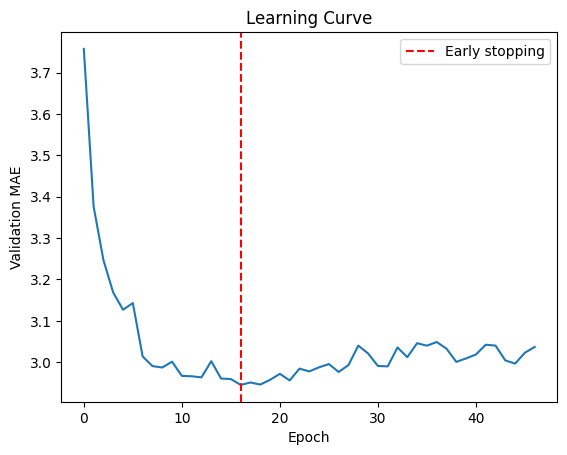

In [9]:
import matplotlib.pyplot as plt

log_file = 'data/model/dcrnn_DR_3_h_6_64-64_lr_0.01_bs_512_0414221406/info.log'

val_mae_values = []
stop_epoch = None
patience = 30

with open(log_file, 'r') as f:
    for line in f:
        if 'val_mae' in line:
            val_mae = float(line.split('val_mae: ')[1].split(',')[0])
            val_mae_values.append(val_mae)
        if 'Early stopping at epoch' in line:
            stop_epoch = int(line.split('epoch: ')[1]) - patience

plt.plot(val_mae_values)
if stop_epoch:
    plt.axvline(x=stop_epoch, color='r', linestyle='--', label='Early stopping')
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')
plt.title('Learning Curve')
plt.legend()
plt.show()
